# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/challenge-two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

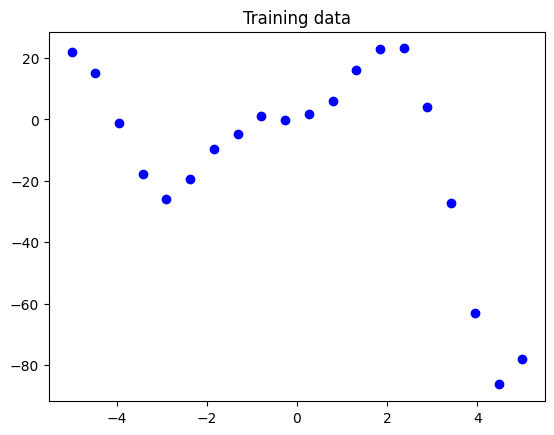

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# create training dataset
train_points = 20 #aumentare i punti di training e vedere cosa succede 
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#plot dei dati
fig,ax=plt.subplots()
ax.scatter(X_train,y_train,color='blue')
plt.title('Training data')
plt.show()

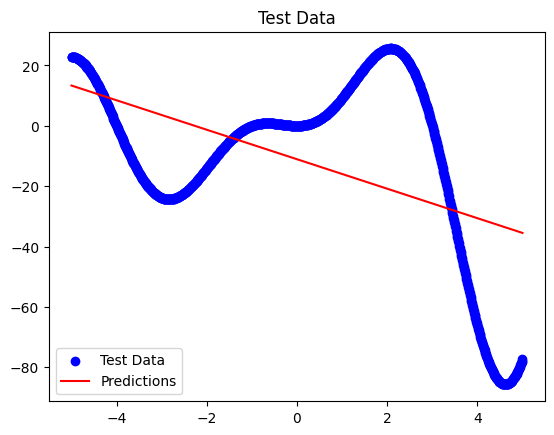

In [62]:
#Linear Ridge Regression model
from sklearn.linear_model import Ridge

#fit del modello 
rr= Ridge(alpha= 10)
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)

fig, ax = plt.subplots()


# Plot dei dati di test e delle predizioni
ax.scatter(X_test, y_test, color='blue', label='Test Data')
ax.plot(X_test, y_pred, color='red', label='Predictions')
ax.set_title('Test Data')
ax.legend()

In [63]:
#Root Squared Mean Error
from sklearn.metrics import mean_squared_error
import math


### Kernel Ridge Regression

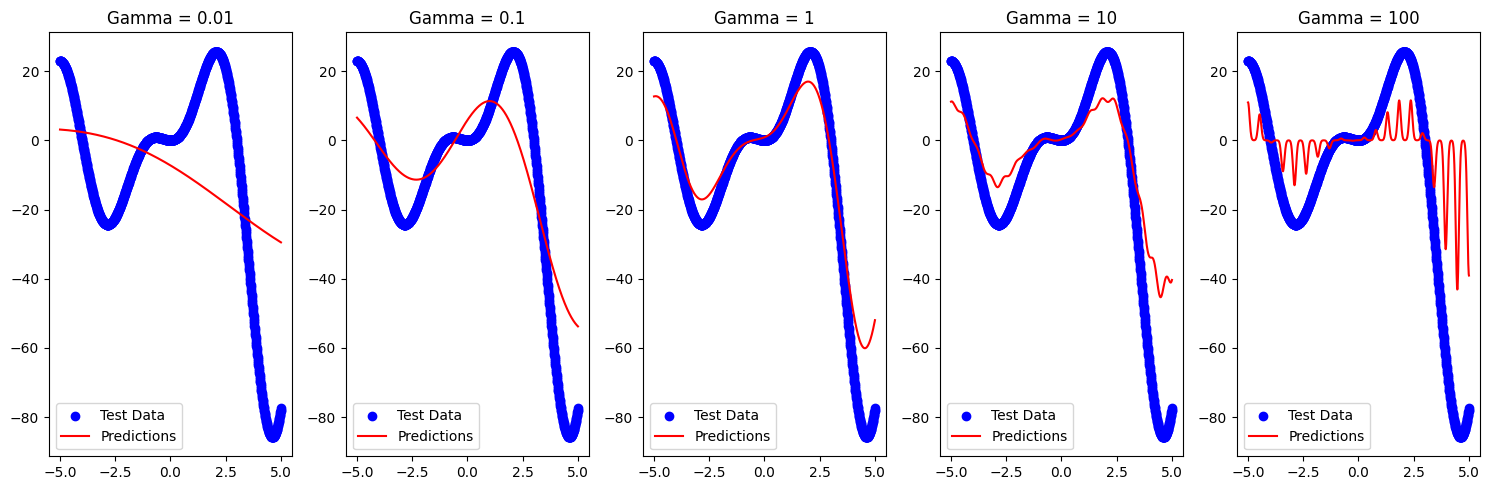

In [64]:
#Kernel Ridge Regression con un kernel Gaussiano
from sklearn.kernel_ridge import KernelRidge
gammas = [0.01, 0.1, 1, 10, 100]

fig, axs = plt.subplots(1, len(gammas), figsize=(15, 5))

#che cosa succede al variare di gamma?
for i, gamma in enumerate(gammas):
    krr = KernelRidge(gamma=gamma, kernel='rbf')
    krr.fit(X_train, y_train)
    y_pred = krr.predict(X_test)
    axs[i].scatter(X_test, y_test, color='blue', label='Test Data')
    axs[i].plot(X_test, y_pred, color='red', label='Predictions')
    axs[i].set_title('Gamma = {}'.format(gamma))
    axs[i].legend()

plt.tight_layout()
plt.show()


In [66]:
#Modello migliore 
krr = KernelRidge(gamma=1, kernel='rbf')
krr.fit(X_train, y_train)

#Root Squared Mean Error
y_pred = krr.predict(X_test)
mse_gaussian = mean_squared_error(y_test, y_pred)
rmse_gaussian = math.sqrt(mse_gaussian)
print('rmse: ', rmse_gaussian)

rmse:  9.279568215169675


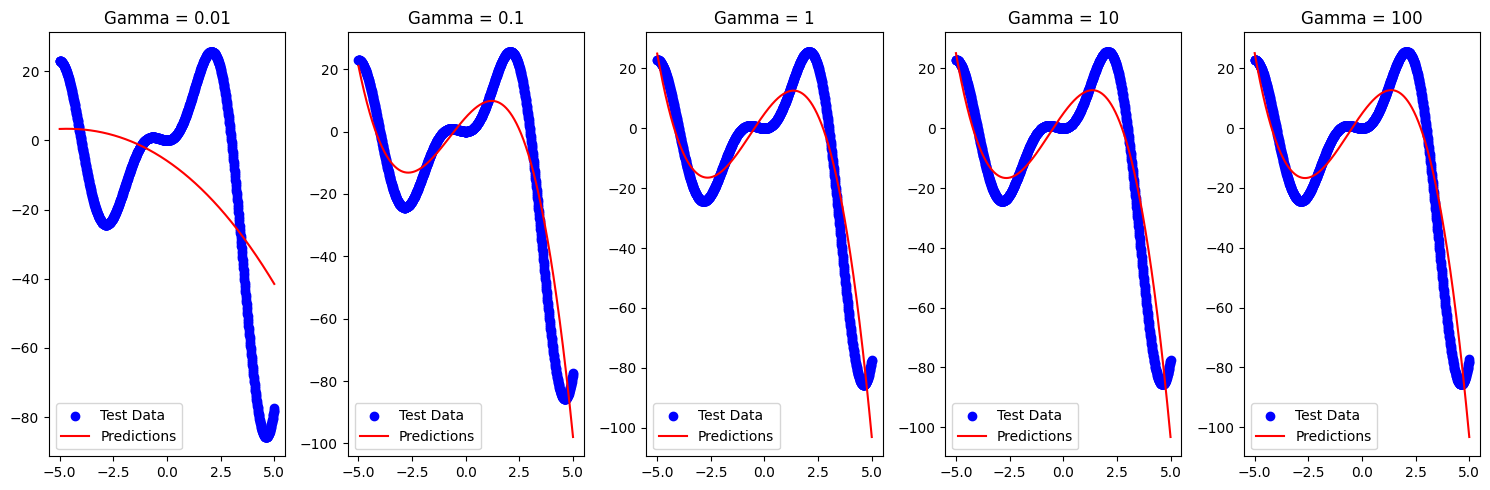

In [68]:
#Kernel Ridge Regression con un kernel Polinomiale

gammas = [0.01, 0.1, 1, 10, 100]

fig, axs = plt.subplots(1, len(gammas), figsize=(15, 5))

#che cosa succede al variare di gamma?
for i, gamma in enumerate(gammas):
    krr = KernelRidge(gamma=gamma, kernel='polynomial')
    krr.fit(X_train, y_train)
    y_pred = krr.predict(X_test)
    axs[i].scatter(X_test, y_test, color='blue', label='Test Data')
    axs[i].plot(X_test, y_pred, color='red', label='Predictions')
    axs[i].set_title('Gamma = {}'.format(gamma))
    axs[i].legend()

plt.tight_layout()
plt.show()

Il parametro migliore è gamma= 0.1, con gamma=0.01 underfitting.

In [69]:
#Modello migliore
krr = KernelRidge(gamma=0.1, kernel='polynomial')
krr.fit(X_train, y_train)

#Root Squared Mean Error
y_pred = krr.predict(X_test)
mse_pol = mean_squared_error(y_test, y_pred)
rmse_pol = math.sqrt(mse_pol)
print('rmse: ', rmse_pol)

rmse:  10.892668696095672


## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [70]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

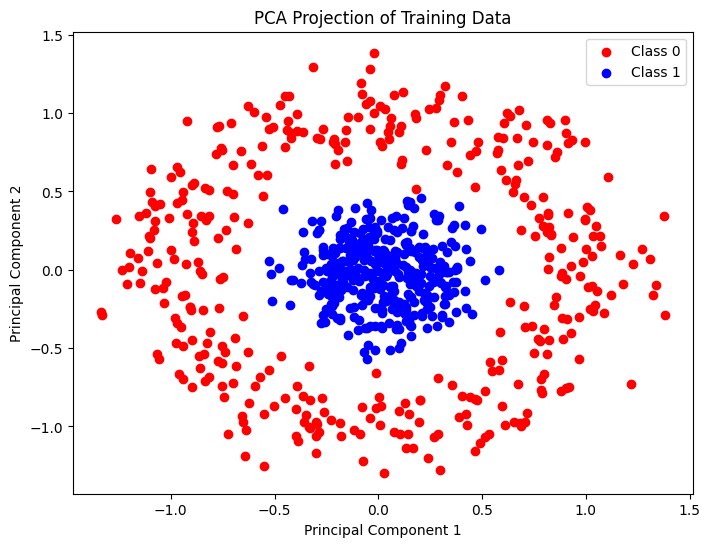

In [71]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Grafico
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='blue', label='Class 1')
plt.title('PCA Projection of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

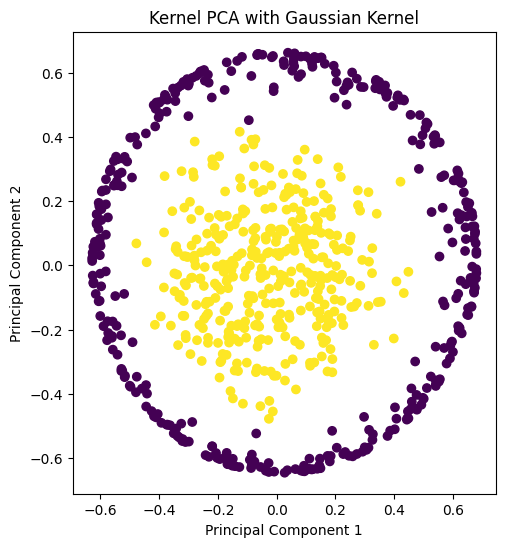

In [82]:
#Kernel PCA
from sklearn.decomposition import KernelPCA
kpca_gaussian = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca_gaussian = kpca_gaussian.fit_transform(X_train)

kpca_custom = KernelPCA(n_components=2, kernel='sigmoid')
X_train_kpca_custom = kpca_custom.fit_transform(X_train)

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_kpca_gaussian[:, 0], X_train_kpca_gaussian[:, 1], c=y_train)
plt.title('Kernel PCA with Gaussian Kernel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

E' meglio usare il kernel? 

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definire il modello SVM con il kernel specificato (ad esempio, kernel lineare)
svm_model_no_kernel = SVC(kernel='linear')

# Addestrare il modello SVM sul set di addestramento
svm_model_no_kernel.fit(X_train_pca, y_train)

# Effettuare predizioni sul set di dati di test
y_test_pred_no_kernel = svm_model_no_kernel.predict(pca.transform(X_test))

# Calcolare l'accuratezza del modello sul set di dati di test
accuracy_no_kernel = accuracy_score(y_test, y_test_pred_no_kernel)
print("Accuracy with linear kernel (without PCA kernel):", accuracy_no_kernel)

Accuracy with linear kernel (without PCA kernel): 0.632


In [74]:

# Definire il modello SVM con il kernel specificato (ad esempio, kernel lineare)
svm_model = SVC(kernel='rbf')

# Addestrare il modello SVM sul set di addestramento
svm_model.fit(X_train, y_train)

# Effettuare predizioni sul set di dati di test
y_test_pred = svm_model.predict(X_test)

# Calcolare l'accuratezza del modello sul set di dati di test
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy with gaussian kernel:", accuracy)

Accuracy with gaussian kernel: 0.996


## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

Utilizzando sklearn.dataset.make_classification(), i dati possono avere una struttura diversa rispetto ai cerchi concentrici o alle linee rette. Un certo kernel potrebbe funzionare meglio di altri per separare le classi nei dati generati con make_classification(), a seconda della loro distribuzione e separabilità.


In [88]:
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV

Il kernel migliore per questo dataset si è rivelato essere con un parametro e un accuracy di .